<a href="https://colab.research.google.com/github/Jo-009/ML_CA/blob/Ver.2/ML_CA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CA Specifications
1. A Fruits dataset is provided for this project, and it has images of (1) 
   apples, (2)oranges, (3) bananas and (4) a mix of apples, oranges and 
   bananas.
2. Your task is to implement a CNN to recognize the 4 classes accurately.
3. Use the images in the “train” folder to train your image classifier.
4. Then, test the accuracy of your image classifier using images from the 
   “test” folder.
5. Document all your experiments and results. For example, what was done to
   increase the accuracy of your image classifier (e.g. image augmentation).
6. Use Matplotlib to produce any plots that help the reader understand your
   work better.
   
### Submission
The deadline for this project is <b>28 Nov 2021, 6pm</b>.
Please name your submission as <Your_Team_Number><A_or_B>.ipynb. For
example, if you are in Team 1A, then your filename should be Team1A.ipynb.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import cv2
from PIL import Image, ImageOps

### Preprocessing and Loading Data

Derive x_train,x_test,x_val,y_train,y_test and y_val 

<b>x_train</b>: Numpy arrays of the images of the training dataset

<b>y_train</b>: Labels of the training dataset

<b>x_test</b>: Numpy arrays of the images of the testing dataset

<b>y_test</b>: Labels of the testing dataset

<b>x_val</b>: Numpy arrays of the images of the validation dataset

<b>y_val</b>: Labels of the validation dataset

In [ ]:
train_img_path = 'C:/Users/joann/OneDrive/Desktop/ML_CA/train/'
test_img_path = 'C:/Users/joann/OneDrive/Desktop/ML_CA/test/1/' 

### Testing one img

In [ ]:
# #test one img
# img = Image.open(train_img_path + 'mixed_4.jpg')
# img

In [ ]:
# np_img = np.array(img)
# #plt.imshow(np_img)
# np_img.shape

In [ ]:
# # normalize pixels values to between 0.0 to 1.0
# np_img_norm = np_img / 255
# np_img_norm

In [ ]:
# # crop and resize img
# width, height = img.size
# pad = 20    # pixels

# img_crop = img.crop((pad, pad, width-pad, height-pad))
# img_mod = img_crop.resize((650,650))

# img_mod.size

In [ ]:
# # plot modified img
# plt.subplots(figsize=(2,2))
# plt.imshow(img_mod)

### Load data

In [ ]:
train_ds_raw = os.listdir('C:/Users/joann/OneDrive/Desktop/ML_CA/train/')
test_ds_raw = os.listdir('C:/Users/joann/OneDrive/Desktop/ML_CA/test/1/')

In [ ]:
train_ds_raw

['apple_1.jpg',
 'apple_1.xml',
 'apple_10.jpg',
 'apple_10.xml',
 'apple_11.jpg',
 'apple_11.xml',
 'apple_12.jpg',
 'apple_12.xml',
 'apple_13.jpg',
 'apple_13.xml',
 'apple_14.jpg',
 'apple_14.xml',
 'apple_15.jpg',
 'apple_15.xml',
 'apple_16.jpg',
 'apple_16.xml',
 'apple_17.jpg',
 'apple_17.xml',
 'apple_18.jpg',
 'apple_18.xml',
 'apple_19.jpg',
 'apple_19.xml',
 'apple_2.jpg',
 'apple_2.xml',
 'apple_20.jpg',
 'apple_20.xml',
 'apple_21.jpg',
 'apple_21.xml',
 'apple_22.jpg',
 'apple_22.xml',
 'apple_23.jpg',
 'apple_23.xml',
 'apple_24.jpg',
 'apple_24.xml',
 'apple_25.jpg',
 'apple_25.xml',
 'apple_26.jpg',
 'apple_26.xml',
 'apple_27.jpg',
 'apple_27.xml',
 'apple_28.jpg',
 'apple_28.xml',
 'apple_29.jpg',
 'apple_29.xml',
 'apple_3.jpg',
 'apple_3.xml',
 'apple_30.jpg',
 'apple_30.xml',
 'apple_31.jpg',
 'apple_31.xml',
 'apple_32.jpg',
 'apple_32.xml',
 'apple_33.jpg',
 'apple_33.xml',
 'apple_35.jpg',
 'apple_35.xml',
 'apple_36.jpg',
 'apple_36.xml',
 'apple_37.jpg',
 'a

In [ ]:
type(train_ds_raw), len(train_ds_raw)

(list, 480)

### Create X_train

In [ ]:
filenames = []
for label in train_ds_raw:
    if label[-3:] == 'xml': 
        continue              # only take jpeg
    else:
        filenames.append(train_img_path + label)

In [ ]:
# filenames
len(filenames)

240

### Create y_train label

In [ ]:
y_train_label = []

for label in train_ds_raw:
    if label[-3:] == 'xml': 
        continue              #if xml, ignore
    arr = label.split('_')    # else, str manipulation 
    y_train_label.append(arr[0])


In [ ]:
#y_train_label
len(filenames), len(y_train_label)

(240, 240)

### Create df to visualize datasets

In [ ]:
df = pd.DataFrame(columns=['filenames'], data=filenames)

In [ ]:
df['y_train_label'] = y_train_label

In [ ]:
df

,filenames,y_train_label
0,C:/Users/joann/OneDrive/Desktop/ML_CA/train/ap...,apple
1,C:/Users/joann/OneDrive/Desktop/ML_CA/train/ap...,apple
2,C:/Users/joann/OneDrive/Desktop/ML_CA/train/ap...,apple
3,C:/Users/joann/OneDrive/Desktop/ML_CA/train/ap...,apple
4,C:/Users/joann/OneDrive/Desktop/ML_CA/train/ap...,apple
...,...,...
235,C:/Users/joann/OneDrive/Desktop/ML_CA/train/or...,orange
236,C:/Users/joann/OneDrive/Desktop/ML_CA/train/or...,orange
237,C:/Users/joann/OneDrive/Desktop/ML_CA/train/or...,orange
238,C:/Users/joann/OneDrive/Desktop/ML_CA/train/or...,orange


In [ ]:
# img = cv2.imread(filenames[10], cv2.IMREAD_COLOR)
# img.shape

### Plot Histogram to set size of images

In [ ]:
# plot histogram
# decide which is the more common size for img
# Getting the dimensions of all the image into a list
dim1 = []
dim2 = []
colors = []

for img_filename in filenames:
    x, y, c = plt.imread(img_filename).shape # height width color
    dim1.append(x)
    dim2.append(y)
    colors.append(c)

In [ ]:
dim1 = np.array(dim1)
dim2 = np.array(dim2)
colors = np.array(colors)

In [ ]:
dim1.max(), dim2.max(), colors.mean()

(4605, 3160, 3.1083333333333334)

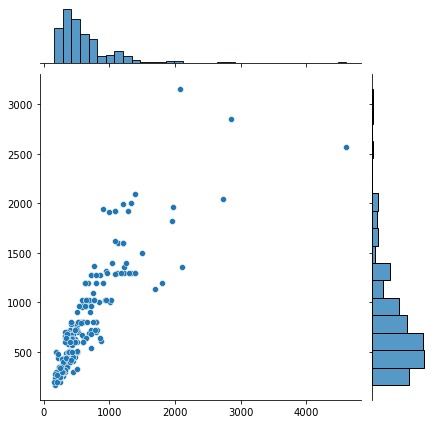

In [ ]:
sns.jointplot(x=dim1, y=dim2);

In [ ]:
dim1.mean(), dim2.mean()

(633.5083333333333, 789.2166666666667)

resize according to findings:
*Taking the mean of the image size, we set the image size to be 650 by 650 by 3 for easier computation*
**image_size = (650, 650)**

### Resize images to proper and similar size and create x_train

In [ ]:
# x_train = None

# for i in range(len(filenames)):
#     img_raw = Image.open(filenames[i])  
#     greyscale_img = ImageOps.grayscale(img_raw)
#     img_reshaped = greyscale_img.resize((200, 200))   
#     if x_train is None:
#         x_train = img_reshaped
#     else:
#         x_train = np.concatenate((x_train, img_reshaped))

# x_train = x_train.reshape(-1, 200, 200, 1)
# x_train.shape

In [ ]:
x_train = None

for i in range(len(y_train_label)):
    img_raw = cv2.imread(filenames[i], cv2.IMREAD_COLOR)
    img_reshaped = cv2.resize(img_raw,(250, 250), cv2.INTER_NEAREST)
    img_reshaped = cv2.cvtColor(img_reshaped, cv2.COLOR_BGR2RGB)
    if x_train is None:
        x_train = img_reshaped
    else:
        x_train = np.concatenate((x_train, img_reshaped))
# Verify data shaped correctly
x_train = x_train.reshape(-1, 250, 250, 3)
x_train.shape

(240, 250, 250, 3)

Verify that data is shaped correctly by randomly retrieving an individual data to view

In [ ]:
# # img2 = Image.fromarray(x_train[1])
# # --> bug in scipy so shape can throw error
# img2 = np.array(Image.fromarray((x_train[1] * 255).astype(np.uint8)).convert('RGB'))
# plt.subplots(figsize=(2,2))
# plt.imshow(img2)

**Determine max value of each cell and min before normalizing**

In [ ]:
x_train.max(), x_train.min()

(255, 0)

**Normalize dataset**

In [ ]:
x_train = x_train/255
print(x_train.shape)

(240, 250, 250, 3)


One-Hot Encoding data using keras to_categorical

In [ ]:
#labels in str
cat = np.unique(y_train_label)
cat

array(['apple', 'banana', 'mixed', 'orange'], dtype='<U6')

In [ ]:
n_labels = len(cat)
n_labels

4

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

#instantiate one hot encoding
encoder = LabelEncoder()
#fit
encoder.fit(y_train_label)
#transform
data = encoder.transform(y_train_label)

y_train = tf.keras.utils.to_categorical(data)
print(y_train) 

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0.

In [ ]:
# to vosualize the labels
categories = pd.DataFrame(data=y_train,
                 columns=encoder.classes_)

print(categories)

     apple  banana  mixed  orange
0      1.0     0.0    0.0     0.0
1      1.0     0.0    0.0     0.0
2      1.0     0.0    0.0     0.0
3      1.0     0.0    0.0     0.0
4      1.0     0.0    0.0     0.0
..     ...     ...    ...     ...
235    0.0     0.0    0.0     1.0
236    0.0     0.0    0.0     1.0
237    0.0     0.0    0.0     1.0
238    0.0     0.0    0.0     1.0
239    0.0     0.0    0.0     1.0

[240 rows x 4 columns]


### Defining Model Architecture
Things like: 
- how many convolutional layers do we want
- what should be the activation function for each layer
- how many hidden units should each layer have etc

#### Construct CNN Model

Create an empty Neural Network via Sequential()
Add more layers (multilayer perceptron, MLP) to 'model' obj to turn it into CNN
- Input layer--> convolutional layer(filters,kernal_size,activation,input_shape)
- Hidden Layers--> Layers of nodes between the input and output layers. There may be one or more of these layers.
- Output Layer--> A layer of nodes that produce the output variables. 

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.RandomFlip('horizontal_and_vertical'))
model.add(tf.keras.layers.RandomRotation(0.9))
model.add(tf.keras.layers.RandomRotation(0.9))
model.add(tf.keras.layers.RandomZoom(fill_mode='nearest',
                                     height_factor=(-0.2, 0.4),
                                     width_factor=(-0.2, 0.4)))
model.add(tf.keras.layers.Conv2D(filters=32, 
                                 kernel_size=(3,3),
                                activation = 'relu', 
                                input_shape= (250,250,3)))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                                activation = 'relu', 
                                input_shape= (250,250,3))) 
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(units=16, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

- When using Softmax as the activation function as the last layer, our loss function should be ‘categorical_crossentropy’
- Optimizers are algorithms to change the weights and the learning rate of our neural network; ‘adam’ is a good choice
- When determining the accuracy of a prediction, use ‘accuracy’ as the metrics as we can count the number of times the neural network has given a correct prediction

In [ ]:
#compiling the CNN
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train the Model

Require training images and their corresponding true labels, validation images and their corresponding true labels (we use these labels only to validate the model and not during the training phase). We also define the number of epochs in this step. For starters, we will run the model for 10 epochs (you can change the number of epochs later).

#### can consider using k-means to calculate epochs

In [ ]:
history = model.fit(x=x_train, y=categories, epochs=50)

Epoch 1/50
8/8 [==============================] - 11s 1s/step - loss: 1.4512 - accuracy: 0.3083
Epoch 2/50
8/8 [==============================] - 10s 1s/step - loss: 1.3443 - accuracy: 0.3542
Epoch 3/50
8/8 [==============================] - 11s 1s/step - loss: 1.2651 - accuracy: 0.4000
Epoch 4/50
8/8 [==============================] - 14s 2s/step - loss: 1.1089 - accuracy: 0.5375
Epoch 5/50
8/8 [==============================] - 12s 1s/step - loss: 1.0287 - accuracy: 0.6125
Epoch 6/50
8/8 [==============================] - 12s 1s/step - loss: 0.9942 - accuracy: 0.6667
Epoch 7/50
8/8 [==============================] - 11s 1s/step - loss: 0.9279 - accuracy: 0.7083
Epoch 8/50
8/8 [==============================] - 13s 2s/step - loss: 0.9078 - accuracy: 0.7292
Epoch 9/50
5/8 [=================>............] - ETA: 6s - loss: 0.8608 - accuracy: 0.7625

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_1 (RandomFlip)  (None, 250, 250, 3)       0         
                                                                 
 random_rotation_2 (RandomRo  (None, 250, 250, 3)      0         
 tation)                                                         
                                                                 
 random_rotation_3 (RandomRo  (None, 250, 250, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 250, 250, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 124, 124, 32)    

Training evaluation: loss and accuracy 

In [ ]:
loss, accuracy = model.evaluate(x=x_train, y=categories)

print('loss = ', loss)
print('accuracy = ', accuracy)

8/8 [==============================] - 2s 231ms/step - loss: 0.2466 - accuracy: 0.9375
loss =  0.24657471477985382
accuracy =  0.9375


Plotting "Loss" and "accuracy" graphs

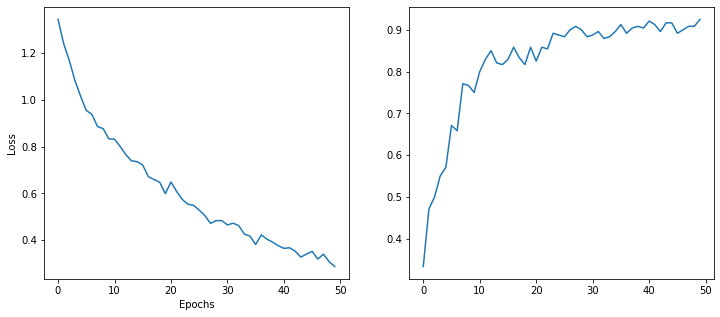

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

ax[0].plot(history.history['loss'])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')

ax[1].plot(history.history['accuracy'])

plt.show()

### Testing!

#### Estimate model's performance and predict classes
- load test data (img) and go through pre-processing 
      # test = pd.read_csv('test.csv')
- read and store all test images
      # test_image = []
      # for i in tqdm(range(test.shape[0])):
      # img = image.load_img('test/'+test['id'][i].astype('str')+'.png', target_size=(28,28,1), grayscale=True)
      # img = image.img_to_array(img)
      # img = img/255
      # test_image.append(img)
      # test = np.array(test_image) -->
- make predictions
      # prediction = model.predict_classes(test)

In [ ]:
test_ds_raw

['apple_77.jpg',
 'apple_77.xml',
 'apple_78.jpg',
 'apple_78.xml',
 'apple_79.jpg',
 'apple_79.xml',
 'apple_80.jpg',
 'apple_80.xml',
 'apple_81.jpg',
 'apple_81.xml',
 'apple_82.jpg',
 'apple_82.xml',
 'apple_83.jpg',
 'apple_83.xml',
 'apple_84.jpg',
 'apple_84.xml',
 'apple_85.jpg',
 'apple_85.xml',
 'apple_86.jpg',
 'apple_86.xml',
 'apple_87.jpg',
 'apple_87.xml',
 'apple_88.jpg',
 'apple_88.xml',
 'apple_89.jpg',
 'apple_89.xml',
 'apple_90.jpg',
 'apple_90.xml',
 'apple_91.jpg',
 'apple_91.xml',
 'apple_92.jpg',
 'apple_92.xml',
 'apple_93.jpg',
 'apple_93.xml',
 'apple_94.jpg',
 'apple_94.xml',
 'apple_95.jpg',
 'apple_95.xml',
 'banana_77.jpg',
 'banana_77.xml',
 'banana_78.jpg',
 'banana_78.xml',
 'banana_79.jpg',
 'banana_79.xml',
 'banana_80.jpg',
 'banana_80.xml',
 'banana_81.jpg',
 'banana_81.xml',
 'banana_82.jpg',
 'banana_82.xml',
 'banana_83.jpg',
 'banana_83.xml',
 'banana_84.jpg',
 'banana_84.xml',
 'banana_85.jpg',
 'banana_85.xml',
 'banana_86.jpg',
 'banana_86.

In [ ]:
type(test_ds_raw), len(test_ds_raw)

(list, 120)

Create x_test

In [ ]:
filenames1 = []
for label in test_ds_raw:
    if label[-3:] == 'xml': 
        continue              # only take jpeg
    else:
        filenames1.append(test_img_path + label)

In [ ]:
# filenames
len(filenames1)

60

Create y_test

In [ ]:
y_test_label = []

for label in test_ds_raw:
    if label[-3:] == 'xml': 
        continue              #if xml, ignore
    arr = label.split('_')    # else, str manipulation 
    y_test_label.append(arr[0])

In [ ]:
#y_train_label
len(filenames1), len(y_test_label)

(60, 60)

Resize x_test

In [ ]:
x_test = None

for i in range(len(y_test_label)):
    img_raw = cv2.imread(filenames1[i], cv2.IMREAD_COLOR)
    img_reshaped = cv2.resize(img_raw,(250, 250), cv2.INTER_NEAREST)
    img_reshaped = cv2.cvtColor(img_reshaped, cv2.COLOR_BGR2RGB)
    if x_test is None:
        x_test = img_reshaped
    else:
        x_test = np.concatenate((x_test, img_reshaped))

In [ ]:
x_test = x_test.reshape(-1, 250, 250, 3)
x_test.shape

(60, 250, 250, 3)

In [ ]:
x_test = x_test/255
print(x_test.shape)

(60, 250, 250, 3)


Hot-Encode y_test labels

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

#instantiate one hot encoding
encoder = LabelEncoder()
#fit
encoder.fit(y_test_label)
#transform
data = encoder.transform(y_test_label)

y_test = tf.keras.utils.to_categorical(data)
print(y_test) 

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [ ]:
# to vosualize the labels
categories1 = pd.DataFrame(data=y_test,
                 columns=encoder.classes_)

print(categories1)

    apple  banana  mixed  orange
0     1.0     0.0    0.0     0.0
1     1.0     0.0    0.0     0.0
2     1.0     0.0    0.0     0.0
3     1.0     0.0    0.0     0.0
4     1.0     0.0    0.0     0.0
5     1.0     0.0    0.0     0.0
6     1.0     0.0    0.0     0.0
7     1.0     0.0    0.0     0.0
8     1.0     0.0    0.0     0.0
9     1.0     0.0    0.0     0.0
10    1.0     0.0    0.0     0.0
11    1.0     0.0    0.0     0.0
12    1.0     0.0    0.0     0.0
13    1.0     0.0    0.0     0.0
14    1.0     0.0    0.0     0.0
15    1.0     0.0    0.0     0.0
16    1.0     0.0    0.0     0.0
17    1.0     0.0    0.0     0.0
18    1.0     0.0    0.0     0.0
19    0.0     1.0    0.0     0.0
20    0.0     1.0    0.0     0.0
21    0.0     1.0    0.0     0.0
22    0.0     1.0    0.0     0.0
23    0.0     1.0    0.0     0.0
24    0.0     1.0    0.0     0.0
25    0.0     1.0    0.0     0.0
26    0.0     1.0    0.0     0.0
27    0.0     1.0    0.0     0.0
28    0.0     1.0    0.0     0.0
29    0.0 

Perform auto-evaluation

In [ ]:
loss, accuracy = model.evaluate(x=x_test, y=categories1)

print('loss = ', loss)
print('accuracy = ', accuracy)

2/2 [==============================] - 1s 222ms/step - loss: 0.4257 - accuracy: 0.8667
loss =  0.4256797134876251
accuracy =  0.8666666746139526


Perform simple manual inspection

In [ ]:
predictions = model.predict(x=x_test)
for i in np.arange(len(predictions)):
	print('Actual: ', y_test[i], 'Predicted: ', predictions[i])

Actual:  [1. 0. 0. 0.] Predicted:  [0.9276315  0.01738876 0.03000948 0.02497022]
Actual:  [1. 0. 0. 0.] Predicted:  [0.92945135 0.01676864 0.0297913  0.02398872]
Actual:  [1. 0. 0. 0.] Predicted:  [0.92947906 0.01676015 0.02977487 0.02398596]
Actual:  [1. 0. 0. 0.] Predicted:  [0.92947906 0.01676015 0.02977488 0.02398597]
Actual:  [1. 0. 0. 0.] Predicted:  [0.92947906 0.01676015 0.02977487 0.02398596]
Actual:  [1. 0. 0. 0.] Predicted:  [0.92947906 0.01676015 0.02977487 0.02398596]
Actual:  [1. 0. 0. 0.] Predicted:  [0.92947906 0.01676015 0.02977487 0.02398596]
Actual:  [1. 0. 0. 0.] Predicted:  [0.9294782  0.01676073 0.02977486 0.02398618]
Actual:  [1. 0. 0. 0.] Predicted:  [0.92947906 0.01676017 0.02977487 0.02398597]
Actual:  [1. 0. 0. 0.] Predicted:  [0.23309013 0.5101774  0.15148579 0.10524666]
Actual:  [1. 0. 0. 0.] Predicted:  [0.9294632  0.0167719  0.02977462 0.02399037]
Actual:  [1. 0. 0. 0.] Predicted:  [0.92947656 0.0167606  0.0297759  0.02398688]
Actual:  [1. 0. 0. 0.] Predi

In [ ]:
n_preds = len(predictions)

correct = 0
wrong = 0

for i in np.arange(n_preds):
    pred_max = np.argmax(predictions[i])
    actual_max = np.argmax(y_test[i])
    if pred_max == actual_max:
        correct += 1
    else:
        wrong += 1

print('correct =', correct, ', wrong =', wrong)
print('accuracy = ', correct/n_preds)

correct = 52 , wrong = 8
accuracy =  0.8666666666666667


-- epoch: 50
- layers: relu, softmax; dropout 0.1 --> loss=1.22, accuracy=0.88
- layers: relu, softmax; dropout 0.2 --> loss=0.39, accuracy=0.85
- layers: relu, sigmoid, softmax; dropout 0.2 --> loss=0.48, accuracy= 0.88
- layers: relu, sigmoid, softmax; dropout 0.3 --> loss=0.53 accuracy=0.86
- layers: relu, sigmoid, softmax; dropout 0.1 --> loss=0.46 accuracy=0.88
- Flip,Rotate,Zoom (-0.2)+layers: relu, sigmoid, softmax; dropout 0.2 --> loss=0.38 accuracy=0.88
- Flip,Rotate,Zoom (-0.2)+layers: relu, sigmoid, softmax; dropout 0.2 --> loss=0.42 accuracy=0.86

--epoch: 25
- layers: relu, softmax; dropout 0.1 --> loss=1.29 accuracy=0.88
- layers: relu, softmax; dropout 0.2 --> loss=0.83 accuracy=0.86
- layers: relu, sigmoid, softmax; dropout 0.2 --> loss=0.40 accuracy=0.88

- Flip,Rotate,Zoom (-0.4)+layers: relu, sigmoid, softmax; dropout 0.2 --> loss=0.41 accuracy=0.89
- Flip,Rotate,Zoom (-0.3)+layers: relu, sigmoid, softmax; dropout 0.2 --> loss=0.46 accuracy=0.88
- Flip,Rotate,Zoom (-0.2)+layers: relu, sigmoid, softmax; dropout 0.2 --> loss=0.42 accuracy=0.89
